# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observational trends:

1.Humidity, Cloudiness, and Wind Speed are uniform across the northern and southern hemispheres. Humidity is low, wind is low and cloudiness is evenly dispersed across the board.¶

2.It is hotter at the equator. The cities near equator (0 latitude) have higher maximum temperature, with temperature falling down as the cities go farther from equator.

3.Wind speed does appears to slightly increase as we move away from the equator. Wind speed in most cities are less than 15mph which shows good mild weather today for most places. However, there are some places that have wind speed in higher range (15-25mph).



In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import api_keys

# Import API key
#api_key = api_keys.api_key
# print (api_key)
api_key = input("Enter your OpenWeather API Key: ")
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from time import strftime,localtime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Starting URL for Weather Map API Call
url = url="http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

In [4]:
# set up list to hold response info  
column_names = ["City", "Country","Latitude", "Longitude","Temperature","Humidity","Cloudiness","Wind Speed", "Date Time"]
cities_df = pd.DataFrame(columns=column_names)
cities_df


Empty DataFrame
Columns: [City, Country, Latitude, Longitude, Temperature, Humidity, Cloudiness, Wind Speed, Date Time]
Index: []

In [5]:
#Pulling Data From openweathermap api
import datetime as dt
import time
start_time = time.time()
index = 1

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?&q="
    query_url = url + city.replace(" ","+") + "&units=imperial&APPID=" + api_key
    response = requests.get(query_url).json()
    status_code = response["cod"]
    
#     print(status_code)
#     print(query_url)

    
    if status_code ==200:
        
        cities_df.set_value(index,"City" ,response['name'])
        cities_df.set_value(index,"Country",response["sys"]["country"])
        cities_df.set_value(index,"Latitude",response["coord"]["lat"])
        cities_df.set_value(index, "Longitude",response["coord"]["lon"])
        cities_df.set_value(index, "Temperature",response['main']['temp'])
        cities_df.set_value(index, "Humidity", response['main']['humidity'])
        cities_df.set_value(index, "Cloudiness",response['clouds']['all'])
        cities_df.set_value(index, "Wind Speed",response['wind']['speed'])
        cities_df.set_value(index, "Date Time",dt.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        
        print(index,"City count , City_id:",response["id"])
        print("City Name:" , response["name"])
        print(query_url)
        index = index + 1
        time.sleep(1)
        
    else:
        print("city not found skipping")
    print("---%s seconds ---" %(time.time()-start_time))
    
    
plt.savefig("ApiCalls")  

C:\Users\13143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\13143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\13143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\13143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\13143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is depreca

1 City count , City_id: 3393692
City Name: Itarema
http://api.openweathermap.org/data/2.5/weather?&q=itarema&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1.2176554203033447 seconds ---
2 City count , City_id: 4030556
City Name: Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2.309826612472534 seconds ---
3 City count , City_id: 2094342
City Name: Kavieng
http://api.openweathermap.org/data/2.5/weather?&q=kavieng&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---16.194876194000244 seconds ---
4 City count , City_id: 1015776
City Name: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---19.648488521575928 seconds ---
city not found skipping
---19.720417976379395 seconds ---
5 City count , City_id: 3423146
City Name: Ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat&units=imperial&APPID=84c8d777693af56

---196.62232303619385 seconds ---
42 City count , City_id: 5969025
City Name: Haines Junction
http://api.openweathermap.org/data/2.5/weather?&q=haines+junction&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---198.1538872718811 seconds ---
43 City count , City_id: 6138908
City Name: Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?&q=saint-philippe&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---199.2478244304657 seconds ---
44 City count , City_id: 4501427
City Name: Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port+elizabeth&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---200.35358452796936 seconds ---
45 City count , City_id: 1264976
City Name: Leh
http://api.openweathermap.org/data/2.5/weather?&q=leh&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---204.54753065109253 seconds ---
46 City count , City_id: 2090021
City Name: Namatanai
http://api.openweathermap.org/data/2.5/weather?&q=namatanai&units=imperial&APPID=84c8d

---300.40272665023804 seconds ---
82 City count , City_id: 2132606
City Name: Samarai
http://api.openweathermap.org/data/2.5/weather?&q=samarai&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---302.70931935310364 seconds ---
city not found skipping
---302.8243622779846 seconds ---
83 City count , City_id: 2017155
City Name: Saskylakh
http://api.openweathermap.org/data/2.5/weather?&q=saskylakh&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---303.91153597831726 seconds ---
84 City count , City_id: 1487332
City Name: Verkhnyaya Inta
http://api.openweathermap.org/data/2.5/weather?&q=verkhnyaya+inta&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---305.0794644355774 seconds ---
85 City count , City_id: 964432
City Name: Port Alfred
http://api.openweathermap.org/data/2.5/weather?&q=port+alfred&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---306.2749836444855 seconds ---
86 City count , City_id: 5848280
City Name: Kapaa
http://api.openweathermap.org/data/2.5/wea

---438.2250654697418 seconds ---
122 City count , City_id: 3402648
City Name: Carutapera
http://api.openweathermap.org/data/2.5/weather?&q=carutapera&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---444.1581175327301 seconds ---
123 City count , City_id: 6167817
City Name: Torbay
http://api.openweathermap.org/data/2.5/weather?&q=torbay&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---445.28207898139954 seconds ---
124 City count , City_id: 2112802
City Name: Hasaki
http://api.openweathermap.org/data/2.5/weather?&q=hasaki&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---446.3570628166199 seconds ---
125 City count , City_id: 2020838
City Name: Lensk
http://api.openweathermap.org/data/2.5/weather?&q=lensk&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---447.4321987628937 seconds ---
126 City count , City_id: 2122090
City Name: Pevek
http://api.openweathermap.org/data/2.5/weather?&q=pevek&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---448.60549020

---566.6739223003387 seconds ---
162 City count , City_id: 218680
City Name: Boende
http://api.openweathermap.org/data/2.5/weather?&q=boende&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---567.8480739593506 seconds ---
163 City count , City_id: 1606851
City Name: Sai Buri
http://api.openweathermap.org/data/2.5/weather?&q=sai+buri&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---569.0148582458496 seconds ---
164 City count , City_id: 1631766
City Name: Pekalongan
http://api.openweathermap.org/data/2.5/weather?&q=pekalongan&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---571.6566009521484 seconds ---
165 City count , City_id: 2013459
City Name: Verkh-Usugli
http://api.openweathermap.org/data/2.5/weather?&q=verkh-usugli&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---575.2908878326416 seconds ---
166 City count , City_id: 3460954
City Name: Praia
http://api.openweathermap.org/data/2.5/weather?&q=praia&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3

---1014.9627475738525 seconds ---
243 City count , City_id: 2514651
City Name: Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?&q=los+llanos+de+aridane&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1041.396895647049 seconds ---
244 City count , City_id: 2825297
City Name: Stuttgart
http://api.openweathermap.org/data/2.5/weather?&q=stuttgart&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1042.5332787036896 seconds ---
city not found skipping
---1042.671587228775 seconds ---
city not found skipping
---1042.7519752979279 seconds ---
245 City count , City_id: 2031964
City Name: Darhan
http://api.openweathermap.org/data/2.5/weather?&q=darhan&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1043.9337749481201 seconds ---
246 City count , City_id: 3571913
City Name: Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?&q=marsh+harbour&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1045.0630033016205 seconds ---
247 City count

---1192.1305940151215 seconds ---
282 City count , City_id: 2125711
City Name: Esso
http://api.openweathermap.org/data/2.5/weather?&q=esso&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1193.3097014427185 seconds ---
283 City count , City_id: 5030005
City Name: Hibbing
http://api.openweathermap.org/data/2.5/weather?&q=hibbing&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1194.383010149002 seconds ---
284 City count , City_id: 5882953
City Name: Aklavik
http://api.openweathermap.org/data/2.5/weather?&q=aklavik&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1198.6587898731232 seconds ---
285 City count , City_id: 286621
City Name: Salalah
http://api.openweathermap.org/data/2.5/weather?&q=salalah&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1199.781468629837 seconds ---
286 City count , City_id: 64013
City Name: Bosaso
http://api.openweathermap.org/data/2.5/weather?&q=bosaso&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1226.0111417770

---1345.8813307285309 seconds ---
322 City count , City_id: 5983720
City Name: Iqaluit
http://api.openweathermap.org/data/2.5/weather?&q=iqaluit&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1347.0561130046844 seconds ---
city not found skipping
---1347.1518700122833 seconds ---
323 City count , City_id: 3860443
City Name: Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?&q=comodoro+rivadavia&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1359.7873396873474 seconds ---
324 City count , City_id: 2381334
City Name: Atar
http://api.openweathermap.org/data/2.5/weather?&q=atar&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1365.6551594734192 seconds ---
325 City count , City_id: 2446796
City Name: Bilma
http://api.openweathermap.org/data/2.5/weather?&q=bilma&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1366.8463339805603 seconds ---
326 City count , City_id: 5921525
City Name: Mackay
http://api.openweathermap.org/data/2.5/weather?&

362 City count , City_id: 1633419
City Name: Padang
http://api.openweathermap.org/data/2.5/weather?&q=padang&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1609.8103647232056 seconds ---
363 City count , City_id: 1648186
City Name: Bontang
http://api.openweathermap.org/data/2.5/weather?&q=bontang&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1615.2289607524872 seconds ---
city not found skipping
---1615.3231573104858 seconds ---
364 City count , City_id: 884979
City Name: Mutare
http://api.openweathermap.org/data/2.5/weather?&q=mutare&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1630.6019458770752 seconds ---
365 City count , City_id: 499025
City Name: Samoded
http://api.openweathermap.org/data/2.5/weather?&q=samoded&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1631.800238609314 seconds ---
city not found skipping
---1632.0940499305725 seconds ---
366 City count , City_id: 5746545
City Name: Portland
http://api.openweathermap.org/data/2.5/we

---1780.7761306762695 seconds ---
402 City count , City_id: 2737599
City Name: Saldanha
http://api.openweathermap.org/data/2.5/weather?&q=saldanha&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1781.8512406349182 seconds ---
403 City count , City_id: 1176218
City Name: Jand
http://api.openweathermap.org/data/2.5/weather?&q=jand&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1783.0251352787018 seconds ---
404 City count , City_id: 933178
City Name: Pandamatenga
http://api.openweathermap.org/data/2.5/weather?&q=pandamatenga&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1784.1959822177887 seconds ---
405 City count , City_id: 1734651
City Name: Gua Musang
http://api.openweathermap.org/data/2.5/weather?&q=gua+musang&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1785.36519241333 seconds ---
406 City count , City_id: 4429295
City Name: Hattiesburg
http://api.openweathermap.org/data/2.5/weather?&q=hattiesburg&units=imperial&APPID=84c8d777693af5692e805

---1969.8307065963745 seconds ---
443 City count , City_id: 2562247
City Name: Marsaxlokk
http://api.openweathermap.org/data/2.5/weather?&q=marsaxlokk&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1971.0406293869019 seconds ---
444 City count , City_id: 2152659
City Name: Port Macquarie
http://api.openweathermap.org/data/2.5/weather?&q=port+macquarie&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1972.2136404514313 seconds ---
445 City count , City_id: 5379533
City Name: Orange Cove
http://api.openweathermap.org/data/2.5/weather?&q=orange+cove&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1998.6270761489868 seconds ---
city not found skipping
---1998.739325761795 seconds ---
446 City count , City_id: 3141667
City Name: Roald
http://api.openweathermap.org/data/2.5/weather?&q=roald&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---1999.993527173996 seconds ---
447 City count , City_id: 3437443
City Name: Pozo Colorado
http://api.openweathermap.org/d

---2139.6873409748077 seconds ---
483 City count , City_id: 6693679
City Name: Gizo
http://api.openweathermap.org/data/2.5/weather?&q=gizo&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2166.0379853248596 seconds ---
484 City count , City_id: 2236967
City Name: Soyo
http://api.openweathermap.org/data/2.5/weather?&q=soyo&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2167.1436488628387 seconds ---
485 City count , City_id: 3448033
City Name: Sapucaia
http://api.openweathermap.org/data/2.5/weather?&q=sapucaia&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2175.8753221035004 seconds ---
city not found skipping
---2176.0000154972076 seconds ---
486 City count , City_id: 3894426
City Name: Coihaique
http://api.openweathermap.org/data/2.5/weather?&q=coihaique&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2177.2070310115814 seconds ---
487 City count , City_id: 1489661
City Name: Tevriz
http://api.openweathermap.org/data/2.5/weather?&q=tevriz&units=imp

---2358.498960494995 seconds ---
524 City count , City_id: 633221
City Name: Uusikaupunki
http://api.openweathermap.org/data/2.5/weather?&q=uusikaupunki&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2359.674108505249 seconds ---
525 City count , City_id: 2643741
City Name: Westminster
http://api.openweathermap.org/data/2.5/weather?&q=westminster&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2361.166572332382 seconds ---
526 City count , City_id: 1488414
City Name: Urengoy
http://api.openweathermap.org/data/2.5/weather?&q=urengoy&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2362.3726398944855 seconds ---
527 City count , City_id: 3653967
City Name: Muisne
http://api.openweathermap.org/data/2.5/weather?&q=muisne&units=imperial&APPID=84c8d777693af5692e805d96ddb353e3
---2363.5388033390045 seconds ---
528 City count , City_id: 1510377
City Name: Belyy Yar
http://api.openweathermap.org/data/2.5/weather?&q=belyy+yar&units=imperial&APPID=84c8d777693af5692e805d

<Figure size 432x288 with 0 Axes>

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.head(10)

City Country Latitude Longitude Temperature Humidity  \
1           Itarema      BR    -2.92    -39.92       72.13      100   
2           Rikitea      PF   -23.12   -134.97       76.54      100   
3           Kavieng      PG    -2.57     150.8       83.56      100   
4        Bredasdorp      ZA   -34.53     20.04       64.98       88   
5         Ilulissat      GL    69.22     -51.1        17.6       85   
6        Ciuperceni      RO    44.94     23.01       35.01       70   
7        Turukhansk      RU     65.8     87.96       11.56       86   
8            Kodiak      US    39.95    -94.76       20.12       37   
9   Bambous Virieux      MU   -20.34     57.76       81.91       79   
10        Upernavik      GL    72.79    -56.15        0.26      100   

   Cloudiness Wind Speed            Date Time  
1          92       2.73  2019-02-28 22:46:47  
2          92        9.1  2019-02-28 22:46:11  
3          32       2.28  2019-02-28 22:46:49  
4         100        4.7  2019-02-28 22:45:04  
5          24       1.12  2019-02-28 21:50:00  
6           0       8.43  2019-02-28 22:45:16  
7          80      12.46  2019-02-28 22:47:09  
8           1        4.7  2019-02-28 22:45:10  
9          40       6.93  2019-02-28 22:44:00  
10         24      10.45  2019-02-28 22:47:13

In [8]:
cities_df.count()

City           550
Country        550
Latitude       550
Longitude      550
Temperature    550
Humidity       550
Cloudiness     550
Wind Speed     550
Date Time      550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

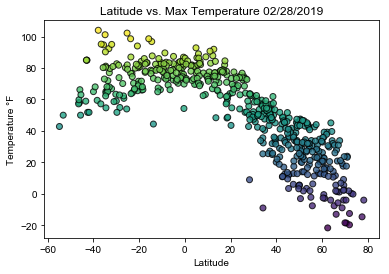

In [9]:
plt.scatter(cities_df["Latitude"],
            cities_df["Temperature"],c=cities_df["Temperature"],
            marker="o", linewidths=1,
            facecolors="orange",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

plt.style.use('seaborn')
plt.title(f"Latitude vs. Max Temperature {dt.datetime.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Temperature °F")
plt.xlabel("Latitude")
plt.savefig("latvstemp.png")         

#### Latitude vs. Humidity Plot

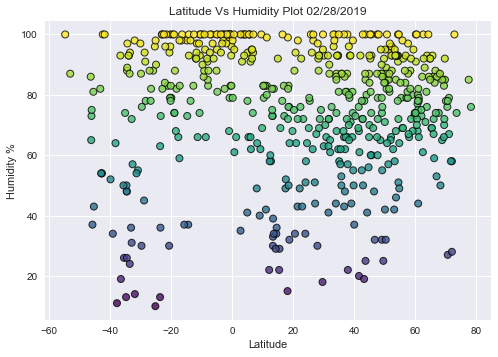

In [10]:
# # Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Humidity"],c=cities_df["Humidity"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

# plt.legend()
plt.style.use('seaborn')
# Templatcharttitle= CurDate,"City Latitude vs. Max Temparature (F)"
# plt.axhline(y=0,color='r',linestyle='-')
plt.title(f"Latitude Vs Humidity Plot {dt.datetime.now().strftime ('%m/%d/%Y')}")
# plt.title(Templatcharttitle)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("latvshumid.png")

#### Latitude vs. Cloudiness Plot

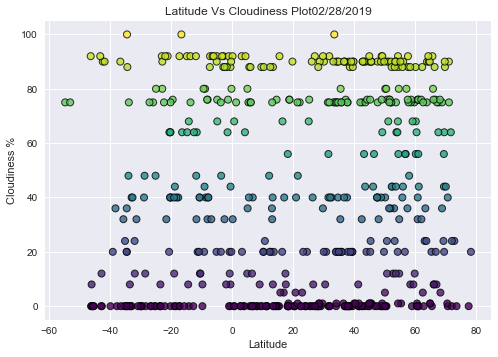

In [11]:
# Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Cloudiness"],c=cities_df["Cloudiness"],
            marker="o", linewidths=1,
            facecolors="lightblue",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

# plt.legend()
plt.style.use('seaborn')
plt.title(f"Latitude Vs Cloudiness Plot{dt.datetime.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig("latvsclouds.png")

#### Latitude vs. Wind Speed Plot

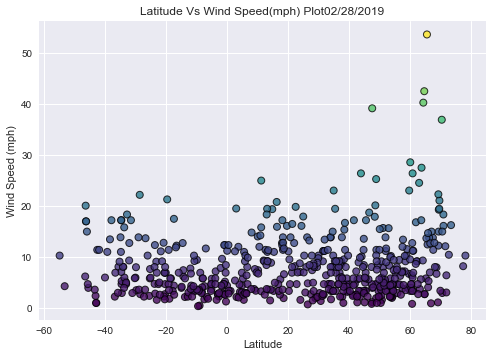

In [12]:
# Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Wind Speed"],c=cities_df["Wind Speed"],
            marker="o", linewidths=1,
            facecolors="yellow",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

plt.style.use('seaborn')
plt.title(f"Latitude Vs Wind Speed(mph) Plot{dt.datetime.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("latvswind.png")          